In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [9]:
np.seed(11)

def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
    
        data = np.randint(low=25, high=1000, size=len(rng))

        status = [1, 2, 3]

        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]

        states = ['GA','FL','fl','NY','NJ','TX']

        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]

        Output.extend(zip(random_states, random_status, data, rng))
    
    return Output
    

In [10]:
dataset= CreateDataSet(4)

In [11]:
df = pd.DataFrame(data = dataset, columns=['State','Status', 'CustCount', 'StatusDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State         836 non-null object
Status        836 non-null int64
CustCount     836 non-null int64
StatusDate    836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [13]:
df.head()

,State,Status,CustCount,StatusDate
0,TX,2,946,2009-01-05
1,FL,2,728,2009-01-12
2,NJ,3,105,2009-01-19
3,TX,3,116,2009-01-26
4,FL,2,362,2009-02-02


In [14]:
df.to_excel('state_data.xlsx', index=None)
print('Done!')

Done!


In [15]:
pd.read_excel?

In [16]:
Location="state_data.xlsx"

In [18]:
df = pd.read_excel(Location, 0, index_col='StatusDate')

In [19]:
df.dtypes

State        object
Status        int64
CustCount     int64
dtype: object

In [20]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [21]:
df.head()

,State,Status,CustCount
StatusDate,,,
2009-01-05,TX,2,946
2009-01-12,FL,2,728
2009-01-19,NJ,3,105
2009-01-26,TX,3,116
2009-02-02,FL,2,362


In [22]:
df['State'].unique()

array(['TX', 'FL', 'NJ', 'fl', 'GA', 'NY'], dtype=object)

In [24]:
df['State'] = df.State.apply(lambda x: x.upper())

In [25]:
df.head()

,State,Status,CustCount
StatusDate,,,
2009-01-05,TX,2,946
2009-01-12,FL,2,728
2009-01-19,NJ,3,105
2009-01-26,TX,3,116
2009-02-02,FL,2,362


In [26]:
mask = df['Status'] == 1

In [27]:
mask

StatusDate
2009-01-05    False
2009-01-12    False
2009-01-19    False
2009-01-26    False
2009-02-02    False
2009-02-09    False
2009-02-16    False
2009-02-23    False
2009-03-02    False
2009-03-09     True
2009-03-16    False
2009-03-23    False
2009-03-30    False
2009-04-06    False
2009-04-13     True
2009-04-20    False
2009-04-27     True
2009-05-04    False
2009-05-11     True
2009-05-18    False
2009-05-25    False
2009-06-01    False
2009-06-08    False
2009-06-15    False
2009-06-22    False
2009-06-29     True
2009-07-06    False
2009-07-13    False
2009-07-20    False
2009-07-27    False
              ...  
2012-06-11    False
2012-06-18    False
2012-06-25    False
2012-07-02    False
2012-07-09     True
2012-07-16     True
2012-07-23    False
2012-07-30     True
2012-08-06    False
2012-08-13    False
2012-08-20    False
2012-08-27    False
2012-09-03     True
2012-09-10    False
2012-09-17     True
2012-09-24    False
2012-10-01    False
2012-10-08    False
2012-10-1

In [28]:
df[mask]

,State,Status,CustCount
StatusDate,,,
2009-03-09,TX,1,608
2009-04-13,NJ,1,713
2009-04-27,NJ,1,441
2009-05-11,NY,1,261
2009-06-29,NY,1,62
2009-08-17,GA,1,529
2009-08-31,FL,1,604
2009-09-28,FL,1,267
2009-10-26,GA,1,633


In [29]:
mask = df['State'] == 'NJ'
df['State'][mask] = 'NY'

C:\Users\Rittick\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
df.head(10)

,State,Status,CustCount
StatusDate,,,
2009-01-05,TX,2,946
2009-01-12,FL,2,728
2009-01-19,NY,3,105
2009-01-26,TX,3,116
2009-02-02,FL,2,362
2009-02-09,TX,3,976
2009-02-16,FL,3,294
2009-02-23,TX,2,357
2009-03-02,GA,2,698


In [31]:
df['State'].unique()

array(['TX', 'FL', 'NY', 'GA'], dtype=object)

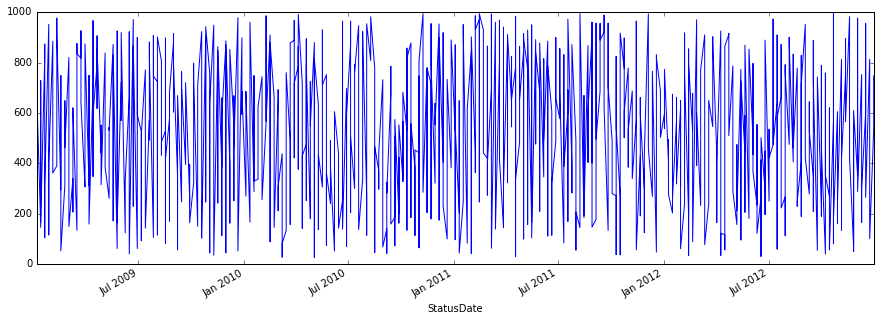

In [32]:
df.CustCount.plot(figsize=(15, 5))

In [33]:
sort_df = df[df['State']== 'NY'].sort_index(axis=0)

In [34]:
sort_df.head(10)

,State,Status,CustCount
StatusDate,,,
2009-01-05,NY,3,153
2009-01-05,NY,2,864
2009-01-12,NY,3,167
2009-01-12,NY,2,420
2009-01-19,NY,3,824
2009-01-19,NY,3,105
2009-01-26,NY,3,952
2009-01-26,NY,2,786
2009-02-09,NY,3,851


In [49]:
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum()

In [50]:
Daily.head()

Status  CustCount
State StatusDate                   
FL    2009-01-05       3        688
      2009-01-12       2        728
      2009-01-19       1        873
      2009-01-26       1        401
      2009-02-02       4       1246

In [51]:
del Daily['Status']

In [52]:
Daily.head(5)

CustCount
State StatusDate           
FL    2009-01-05        688
      2009-01-12        728
      2009-01-19        873
      2009-01-26        401
      2009-02-02       1246

In [53]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-1

In [54]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [55]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=209, freq=None)

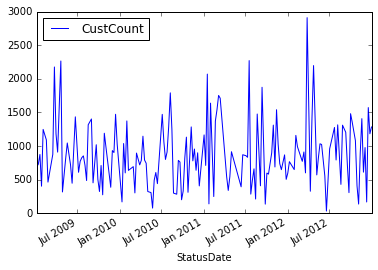

In [56]:
Daily.loc['FL'].plot()

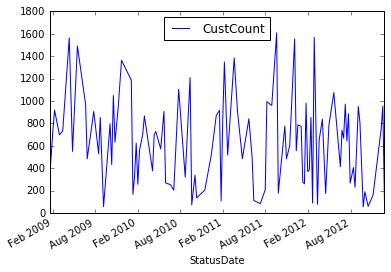

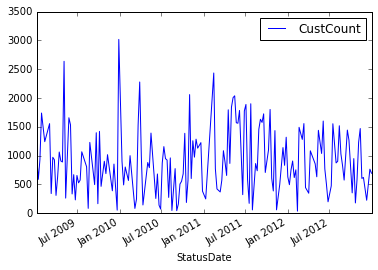

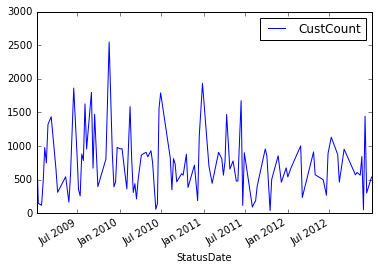

In [57]:
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

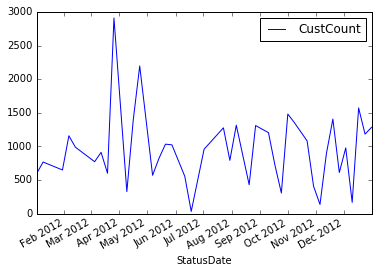

In [59]:
Daily.loc['FL']['2012':].plot()

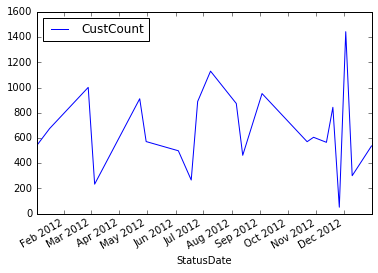

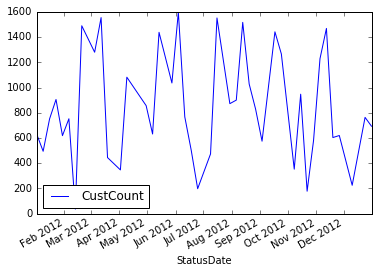

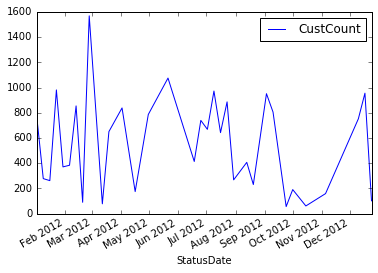

In [60]:
Daily.loc['TX']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['GA']['2012':].plot()

In [62]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustCount'] < Daily['Lower']) | (Daily['CustCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

In [63]:
Daily.head()

CustCount    Lower     Upper Outlier
State StatusDate                                      
FL    2009-01-05        688   86.125  1294.375   False
      2009-01-12        728   86.125  1294.375   False
      2009-01-19        873   86.125  1294.375   False
      2009-01-26        401   86.125  1294.375   False
      2009-02-02       1246 -200.000  2144.000   False

In [64]:
ALL = pd.DataFrame(Daily['CustCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustCount']

In [65]:
ALL

,CustCount
StatusDate,
2009-01-05,2651
2009-01-12,1461
2009-01-19,2111
2009-01-26,2255
2009-02-02,2440
2009-02-09,3136
2009-02-16,1838
2009-02-23,1781
2009-03-02,2252


In [66]:
YearMonth = ALL.groupby([lambda x:x.year, lambda x:x.month])
ALL['Max'] = YearMonth['CustCount'].transform(lambda x:x.max())

In [67]:
ALL.head()

,CustCount,Max
StatusDate,,
2009-01-05,2651,2651
2009-01-12,1461,2651
2009-01-19,2111,2651
2009-01-26,2255,2651
2009-02-02,2440,3136


In [70]:

data = [1000, 2000, 3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [71]:
combined = pd.concat([ALL, BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,BHAG,CustCount,Max
2012-12-17,NaN,2526.0,2526.0
2012-12-24,NaN,2045.0,2526.0
2012-12-31,NaN,2511.0,2526.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


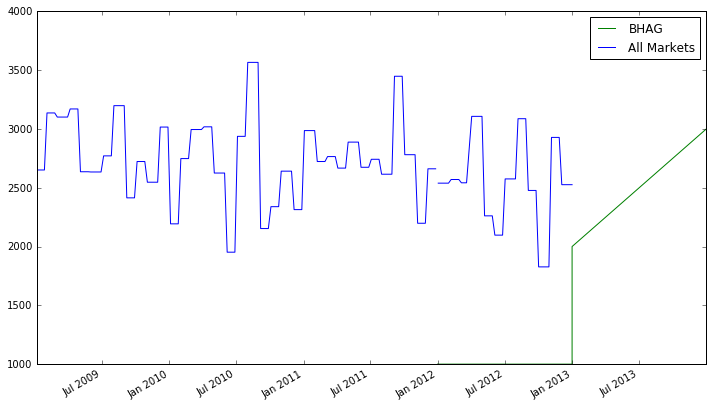

In [73]:
fig, axes = plt.subplots(figsize=(12, 7))
combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best')

In [74]:
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustCount,Max
2009,NaN,3198.0,3198.0
2010,NaN,3566.0,3566.0
2011,1000.0,3448.0,3448.0
2012,2000.0,3107.0,3107.0
2013,3000.0,NaN,NaN


In [75]:
Year['YR_PCT_CHG'] = Year['Max'].pct_change(periods=1)

In [76]:
Year

,BHAG,CustCount,Max,YR_PCT_CHG
2009,NaN,3198.0,3198.0,NaN
2010,NaN,3566.0,3566.0,0.115072
2011,1000.0,3448.0,3448.0,-0.033090
2012,2000.0,3107.0,3107.0,-0.098898
2013,3000.0,NaN,NaN,NaN


In [78]:
(1 + Year.ix[2012,'YR_PCT_CHG']) * Year.loc[2012,'Max']

2799.7241879350349

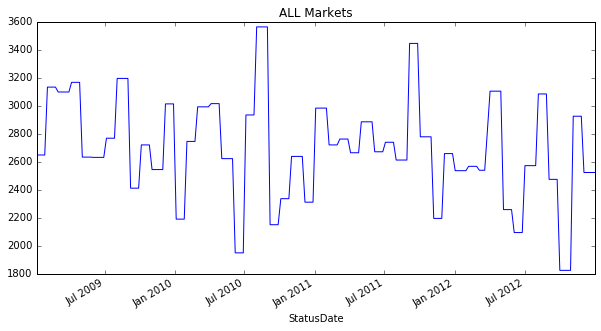

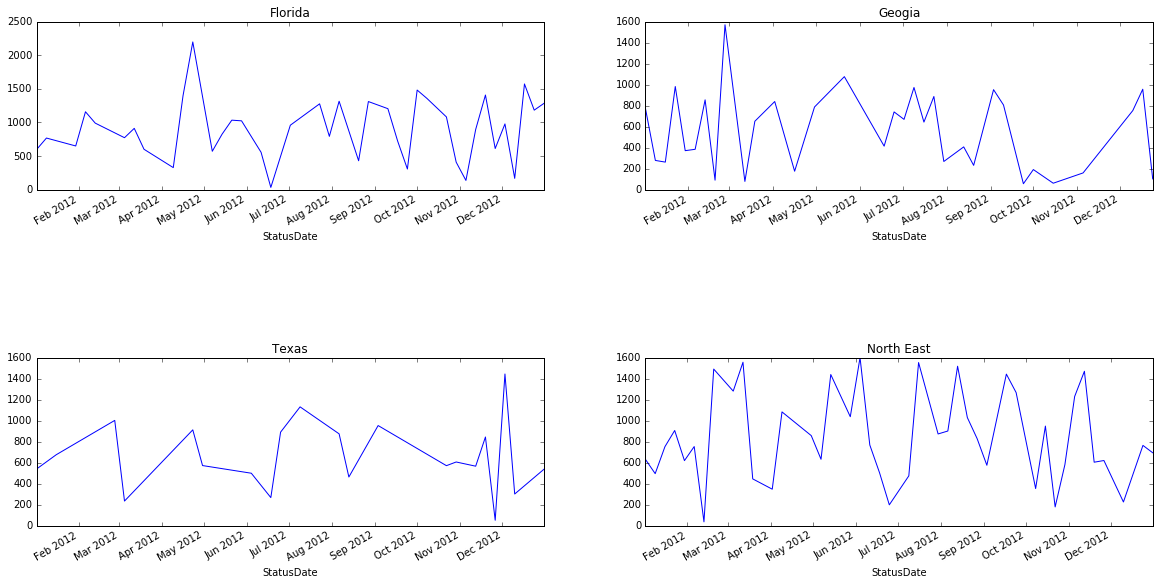

In [86]:
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0)
Daily.loc['FL']['CustCount']['2012':].fillna(method='pad').plot(ax=axes[0, 0])
Daily.loc['GA']['CustCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

axes[0, 0].set_title('Florida')
axes[0, 1].set_title('Geogia')
axes[1, 0].set_title('Texas')
axes[1, 1].set_title('North East')